In [2]:
## imports
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.tsa.ar_model
from sklearn.metrics import mean_squared_error
import numpy as np
from math import sqrt

In [3]:
## loading and reading in csv dataset using pandas
brazil_df = pd.read_csv('brazil_covid19_revised.csv')
brazil_df.head()

,date,region,state,cases,newCases,deaths
0,3/7/20,Centro-Oeste,Distrito Federal,1,1,0
1,3/8/20,Centro-Oeste,Distrito Federal,1,0,0
2,3/9/20,Centro-Oeste,Distrito Federal,1,0,0
3,3/10/20,Centro-Oeste,Distrito Federal,1,0,0
4,3/11/20,Centro-Oeste,Distrito Federal,2,1,0


In [4]:
brazil_df[brazil_df['date'] == '5/14/20']['cases'].sum()

202918

In [5]:
brazil_df['date'] = pd.to_datetime(brazil_df['date'])
brazil_df

,date,region,state,cases,newCases,deaths
0,2020-03-07,Centro-Oeste,Distrito Federal,1,1,0
1,2020-03-08,Centro-Oeste,Distrito Federal,1,0,0
2,2020-03-09,Centro-Oeste,Distrito Federal,1,0,0
3,2020-03-10,Centro-Oeste,Distrito Federal,1,0,0
4,2020-03-11,Centro-Oeste,Distrito Federal,2,1,0
5,2020-03-12,Centro-Oeste,Distrito Federal,2,0,0
6,2020-03-13,Centro-Oeste,Distrito Federal,2,0,0
7,2020-03-14,Centro-Oeste,Distrito Federal,6,4,0
8,2020-03-15,Centro-Oeste,Distrito Federal,8,2,0
9,2020-03-16,Centro-Oeste,Distrito Federal,13,5,0


In [6]:
brazil_df_sort = brazil_df.sort_values(by = 'date')

In [259]:
date_cases = {}
date_cases_keys = brazil_df_sort['date']

final_keys = []
for date in date_cases_keys:
    if date not in final_keys:
        final_keys.append(date)
date_cases_values = []

test_d = '2/24/20'

for d in date_cases_keys:
    if d != test_d:
        value = brazil_df_sort[brazil_df_sort['date'] == d]['cases'].sum()
        date_cases_values.append(value)
        test_d = d

new_columns = list(zip(final_keys, date_cases_values))
new_df = pd.DataFrame(new_columns, columns = ['Date', 'Obs Cases'])

In [235]:
date_cases = {final_keys[i]: date_cases_values[i] for i in range(len(final_keys))} 
date_case = pd.DataFrame.from_dict(date_cases, orient= 'index', columns = ['Cases'])

In [9]:
brazil_df_sort['date'] = pd.to_datetime(brazil_df_sort['date'])

In [10]:
dates_list = []
for date in brazil_df_sort['date']:
    if date not in dates_list:
        dates_list.append(date)
date_cases_2 = {dates_list[i]: date_cases_values[i] for i in range(len(dates_list))} 
date_case_2 = pd.DataFrame.from_dict(date_cases_2, orient= 'index', columns = ['Cases'])

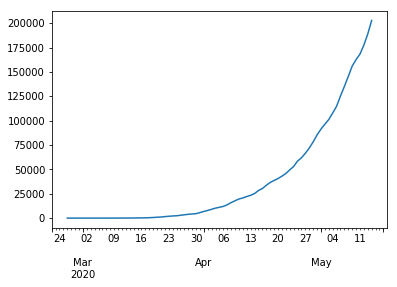

In [11]:
date_case_2['Cases'].plot()
plt.show()

In [12]:
## Determining rolling statistics - stationarety
rolmean = date_case_2.rolling(window= 12).mean()
rolstd = date_case_2.rolling(window=12).std()

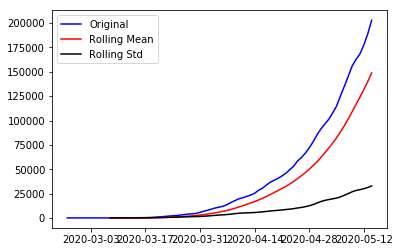

In [145]:
## plot rolling statistics
orig = plt.plot(date_case_2, color = 'blue', label= "Original")
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = "Rolling Std")
plt.legend(loc = 'best')
plt.show(block = False)
## mean and std not constant - so not stationary

In [340]:
## Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-Fuller Test")
test = adfuller(date_case_2['Cases'], autolag = "AIC")

output = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for k,v in test[4].items():
    output['Critical Value (%s)'%k] = v
    
print(output)

##cannot reject null hypothesis - not stationary

Results of Dickey-Fuller Test
Test Statistic                  1.425208
p-value                         0.997226
#Lags Used                      7.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


In [345]:
def est_trend(data, n):
    ##Estimating Trend
    data_est = np.log(data)

    
    ##calculating moving averages

    movingAvg = data_est.rolling(window=12).mean()
    movingStd = data_est.rolling(window = 12).std()
    
    #fig, axs = plt.subplots(3)
    
    plt.figure(1)
    plt.plot(data_est)
    plt.plot(movingAvg, color = 'red')
    
    ##diff between moving averages and actual cases
    diff = data_est - movingAvg
    ##remove null values
    diff.dropna(inplace = True)
    
    plt.figure(2)
    plt.plot(diff)
    plt.plot(movingAvg, color = 'red', label = 'MovingAvg')
    plt.plot(movingStd, color = 'black', label = 'MovingStd')
    

    ##reperform Dickey-Fuller Test on transformed data to check stationarity
    print("Results of Dickey-Fuller Test")
    test = adfuller(data_est['Cases'], autolag = "AIC")

    output = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for k,v in test[4].items():
        output['Critical Value (%s)'%k] = v
    
    print(output)
    
    ##calculate weighted average
    weight_avg = data_est.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
    
    ##exponentiate to reverse log transformation (e^x)
    data_est = np.exp(data_est)
    
    ## prediction 
    
   
    from statsmodels.tsa.ar_model import AR
    from sklearn.metrics import r2_score

    ##split data into train and test
    X = (data_est).dropna()
    n = int(np.floor(0.2 * len(X)))
    train = X[1: len(X) - n]
    test = X
    
    ##fit and train model using split data
    model = AR(train)
    model_fitted = model.fit()
    print('the lag value is: %s' % model_fitted.k_ar)
    lag = model_fitted.k_ar
    
    predict = model_fitted.predict(start = lag, end = len(test) - 1, dynamic = False)

    ##plot predicted data vs. true/observed data
    plt.figure(3)
    plt.title("Predicted vs. Observed Cases")
    plt.legend()
    plt.plot(data_est.head(30), color = 'blue')
    plt.plot(predict.head(19), color = 'red')
    
    ## error analysis - try a few different methods
    
    #r^2 error analysis - not metric to show if model is a good future predictor, but shows if model is good fit to 
    #observed data
    r2_err = r2_score(data_est.tail(len(Y) - lag), predict)
    print('R^2 error: %s' % r2_err)
    
    #mean absolute error - measuring prediction errors because prediction in same unit as original (avg forecast error)
    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(data_est.tail(len(Y) - lag), predict)
    print('Mean Absolute Error: %s' % mae)
    
    #root mean squared error - sqrt average of square of forecase error (mse): basically same as mse but when dealing
    #with prediction in same unit as original - how concentrated is data around line of best fit
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(predict, data_est.tail(len(Y) - lag))
    print('Mean squared error: %s' % mse)
    
    rmse = np.sqrt(mse)
    print('Root mean squared error: %s' % rmse)
    
    
    o = list(data_est['Cases'].tail(len(Y) - lag))
    p = list(predict)
    op = list(zip(o, p))
    ##dataframe with combined original and predicted values
    comb = pd.DataFrame(op, columns = ['Obs', 'Predict'])
    return comb

/Users/anyaaggarwal/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
No handles with labels found to put in legend.


Results of Dickey-Fuller Test
Test Statistic                 -3.428922
p-value                         0.010012
#Lags Used                      8.000000
Number of Observations Used    70.000000
Critical Value (1%)            -3.527426
Critical Value (5%)            -2.903811
Critical Value (10%)           -2.589320
dtype: float64
the lag value is: 11
R^2 error: 0.9448869408158456
Mean Absolute Error: 6386.901872163157
Mean squared error: 169646624.1099469
Root mean squared error: 13024.846414063657


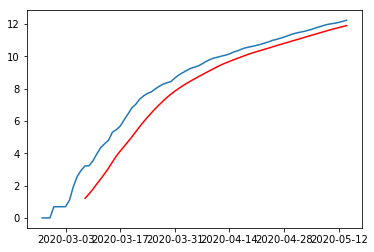

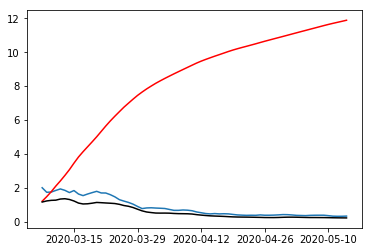

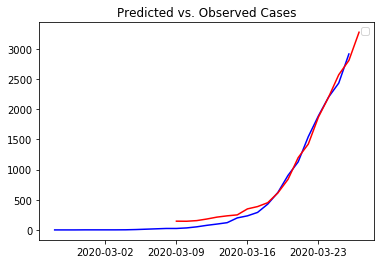

In [346]:
comb = est_trend(date_case_2, 40)

In [352]:
comb['Error'] = np.nan
n = 0
while (n < len(comb['Obs'])):
    error = (comb['Predict'][n] - comb['Obs'][n]) / comb['Obs'][n]
    comb['Error'][n] = error
    n += 1
print("Average Percent Error: %s" % np.mean(comb['Error']))
print(np.sum(comb['Error'][7:]) / (68-7))

Average Percent Error: 0.4348898308020676
0.15880225803800013


In [304]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score

def orig_pred(data):

    Y = data
    n = int(np.floor(0.2 * len(Y)))
    train = Y[: len(Y) - n]
    test = Y

    model = AR(train)
    model_fitted = model.fit()
    print('the lag value is: %s' % model_fitted.k_ar)
    lag = model_fitted.k_ar

    predict = model_fitted.predict(start = lag, end = len(test) - 1, dynamic = False)
    print(predict)

    plt.plot(data)
    plt.title("Original Data Prediction (No Transformation)")
    plt.plot(predict, color = 'red')

    r2_err = r2_score(data.tail(len(Y) - lag), predict)
    print('R^2 error: %s' % r2_err)
    
    #mean absolute error - measuring prediction errors because prediction in same unit as original (avg forecast error)
    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(data.tail(len(Y) - lag), predict)
    print('Mean Absolute Error: %s' % mae)
    
    #root mean squared error - sqrt average of square of forecase error (mse): basically same as mse but when dealing
    #with prediction in same unit as original - how concentrated is data around line of best fit
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(predict, data.tail(len(Y) - lag))
    print('Mean squared error: %s' % mse)
    
    rmse = np.sqrt(mse)
    print('Root mean squared error: %s' % rmse)

the lag value is: 11
2020-03-08       135.316680
2020-03-09       139.356063
2020-03-10       137.864602
2020-03-11       148.525201
2020-03-12       175.051071
2020-03-13       206.695923
2020-03-14       227.697254
2020-03-15       243.777682
2020-03-16       342.844829
2020-03-17       381.362761
2020-03-18       445.531564
2020-03-19       607.904474
2020-03-20       832.516000
2020-03-21      1192.770380
2020-03-22      1418.453379
2020-03-23      1866.724891
2020-03-24      2196.528564
2020-03-25      2566.980135
2020-03-26      2803.837727
2020-03-27      3271.496735
2020-03-28      3969.957358
2020-03-29      4432.395313
2020-03-30      4874.532931
2020-03-31      4805.972743
2020-04-01      6452.565838
2020-04-02      7918.893091
2020-04-03      9150.118291
2020-04-04      9939.647449
2020-04-05     11025.831997
2020-04-06     12060.717097
                  ...      
2020-04-15     27853.041706
2020-04-16     31196.686932
2020-04-17     32746.980321
2020-04-18     36495.437807

/Users/anyaaggarwal/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


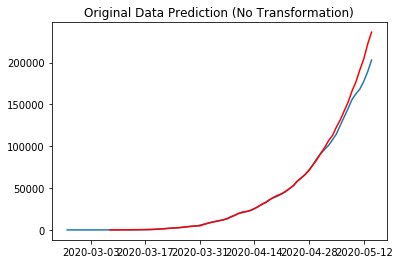

In [233]:
orig_pred(date_case_2)

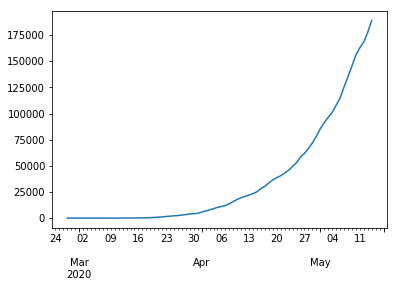

In [30]:
##differencing 
date_case_2['CasesDiff'] = date_case_2['Cases'] = date_case_2['Cases'].shift(1)
date_case_2['CasesDiff'].dropna().plot()